In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14245, done.
remote: Total 14245 (delta 0), reused 0 (delta 0), pack-reused 14245
Receiving objects: 100% (14245/14245), 13.50 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (9810/9810), done.
/content/yolov5
     |████████████████████████████████| 182 kB 6.2 MB/s 
     |████████████████████████████████| 62 kB 230 kB/s 
     |████████████████████████████████| 1.6 MB 14.1 MB/s 
     |████████████████████████████████| 41 kB 638 kB/s 
     |████████████████████████████████| 145 kB 58.3 MB/s 
     |████████████████████████████████| 138 kB 71.4 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 178 kB 68.7 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6InaRY5tSUxnPlxhNa1r")
project = rf.workspace("dany-petkar").project("surbhi")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/surbhi-1 in yolov5pytorch:: 100%|██████████| 152/152 [00:00<00:00, 1970.76it/s]


In [4]:
!python train.py --img 416 --batch 5 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/surbhi-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=5, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-12-g7f5724b Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/surbhi-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-12-g7f5724b Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/7 /content/datasets/surbhi-1/test/images/helmet10_jpeg.rf.557b1ad6c62605806feb3342f0a9e3b8.jpg: 416x416 6 Helmets, 3 No_Helmets, 8.1ms
image 2/7 /content/datasets/surbhi-1/test/images/helmet21_jpg.rf.cb666bbbee1d1bd33b188867f611e45e.jpg: 416x416 6 Helmets, 7 No_Helmets, 8.5ms
image 3/7 /content/datasets/surbhi-1/test/im

In [6]:
!python detect.py --weights /content/yolov5/yolov5s.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/datasets/surbhi-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-12-g7f5724b Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/7 /content/datasets/surbhi-1/test/images/helmet10_jpeg.rf.557b1ad6c62605806feb3342f0a9e3b8.jpg: 416x416 2 persons, 12.1ms
image 2/7 /content/datasets/surbhi-1/test/images/helmet21_jpg.rf.cb666bbbee1d1bd33b188867f611e45e.jpg: 416x416 10 persons, 2 bicycles, 5 cars, 4 motorcycles, 3 buss, 8.5ms
image 3/7 /content/datasets/surbhi-1/test/

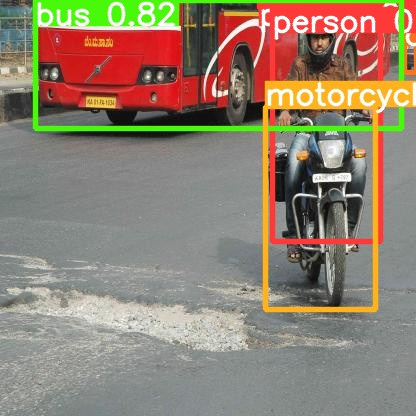

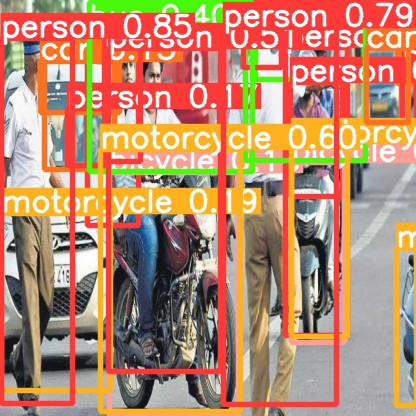

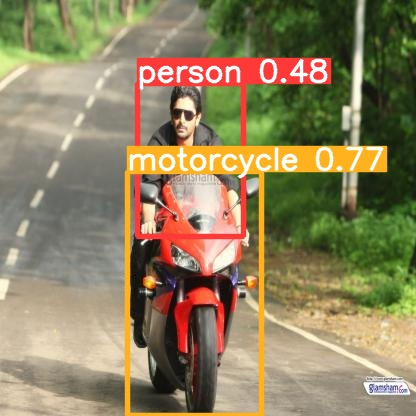

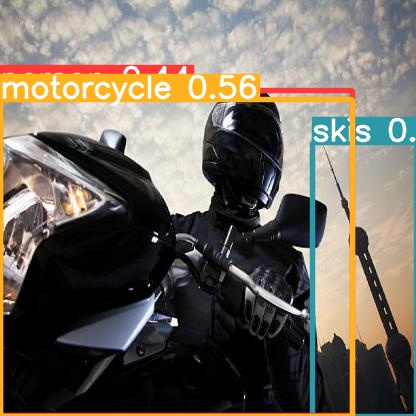

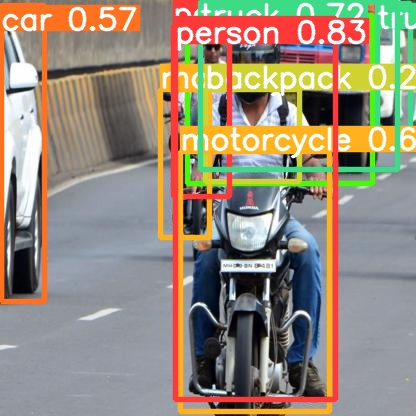

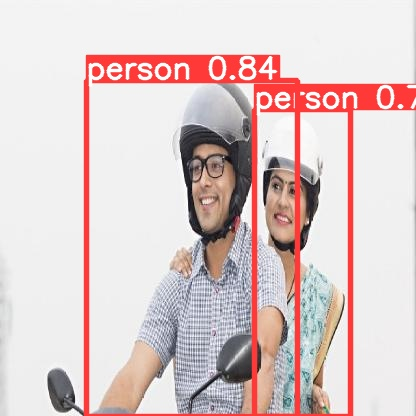

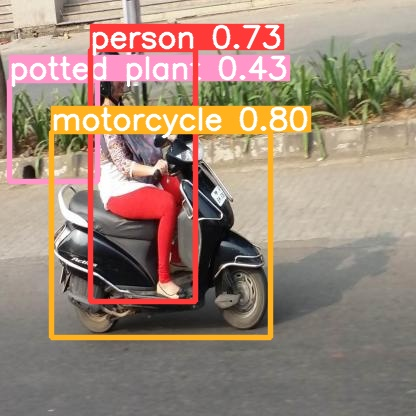

In [7]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [9]:
!python detect.py --weights /content/yolov5/yolov5s.pt --img 416 --conf 0.1 --source https://www.youtube.com/watch?v=0hdkN4u2mJk

Streaming output truncated to the last 5000 lines.
0: 256x416 2 persons, 1 cell phone, 6.1ms
0: 256x416 2 persons, 1 cell phone, 6.0ms
0: 256x416 2 persons, 1 cell phone, 6.3ms
0: 256x416 1 person, 1 cell phone, 6.2ms
0: 256x416 1 person, 1 cell phone, 6.5ms
0: 256x416 1 person, 1 cell phone, 6.1ms
0: 256x416 1 person, 1 cell phone, 6.1ms
0: 256x416 1 person, 1 cell phone, 6.4ms
0: 256x416 1 person, 1 cell phone, 7.0ms
0: 256x416 1 person, 1 cell phone, 7.8ms
0: 256x416 1 person, 1 cell phone, 6.1ms
0: 256x416 1 person, 1 cell phone, 8.0ms
0: 256x416 1 person, 1 cell phone, 6.1ms
0: 256x416 1 person, 1 cell phone, 9.0ms
0: 256x416 1 person, 1 cell phone, 6.4ms
0: 256x416 1 person, 1 cell phone, 7.2ms
0: 256x416 1 person, 1 cell phone, 7.6ms
0: 256x416 1 person, 1 cell phone, 7.2ms
0: 256x416 1 person, 1 laptop, 1 cell phone, 6.3ms
0: 256x416 1 person, 1 laptop, 1 cell phone, 6.3ms
0: 256x416 1 person, 1 laptop, 1 cell phone, 6.2ms
0: 256x416 1 person, 1 laptop, 1 cell phone, 7.4ms
0: 2

In [10]:
!python detect.py --weights /content/yolov5/yolov5s.pt --img 416 --conf 0.1 --source 0

detect: weights=['/content/yolov5/yolov5s.pt'], source=0, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-12-g7f5724b Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.197] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 259, in <module>
    main(opt)
  File "detect.py", line 254, in main
    run(**vars(opt))
  File "/usr/local/lib/pyt